# Module import

In [1]:
from netCDF4 import Dataset                             
import numpy as np                                      
from scipy import ndimage                               
import matplotlib.pyplot as plt                         
from matplotlib.patches import Rectangle                
import matplotlib as mpl                                
from matplotlib.offsetbox import AnchoredText           
import cartopy.crs as ccrs                              
import cartopy.feature as cfeature                   
import warnings
warnings.filterwarnings("ignore")

# Matplotlib parameterisation

In [2]:
plt.style.use('default')                               
plt.rcParams['figure.facecolor'] = 'white'

# Geodata

In [3]:
geodata = np.load("../../data/geodata/lat_lon_2268_2080.npz")
lons = geodata["lon"][:]
lats = geodata["lat"][:]

# Core data

In [ ]:
file = "../../data/core/202307031815.nc"
data = Dataset(file, mode='r')

cores = data["cores"][0, :, :]
raw_cores = np.copy(cores)

lat = data["max_lat"][:]
lon = data["max_lon"][:]

Dakar_lon = -17.467686
Dakar_lat = 14.716677

temp = data["tir"][0, :, :]
binary_cores = (cores != 0).astype(int)

# Dakar Context Domain

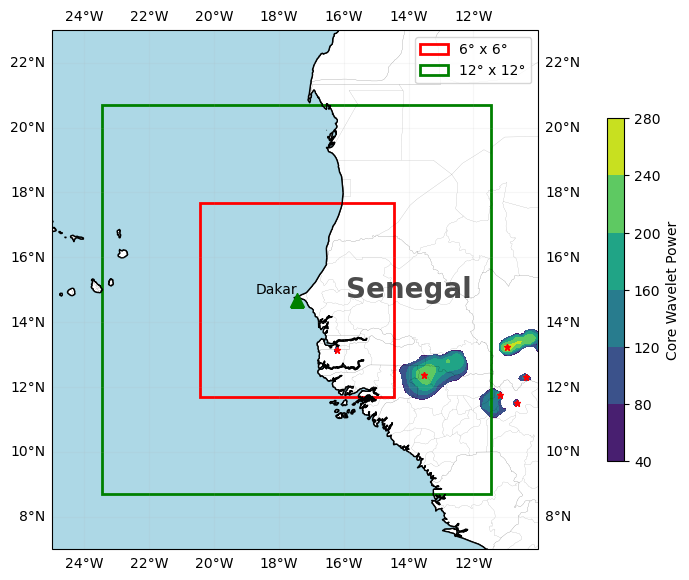

In [68]:
# Define extent
extent = (-25, -10, 7, 23)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional

gl = ax.gridlines(xlocs=np.arange(-26, -8, 2), 
                  ylocs=np.arange(8, 23, 2), 
                  draw_labels=True, 
                  crs=ccrs.PlateCarree(),
                  alpha=0.1
                )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)

ax.add_feature(admin_borders, edgecolor='black', linewidth=0.06)
#contour_presence = ax.contourf(lons, lats, binary_cores, levels = [0.5, 1] ,transform=ccrs.PlateCarree(), cmap="afmhot")
contour_core = ax.contourf(lons, lats, cores, levels=[40, 80, 120, 160, 200, 240, 280], transform=ccrs.PlateCarree(), cmap="viridis")
#plt.contour(lons, lats, cores, levels=[0], colors='red', transform=ccrs.PlateCarree())  

cbar_core = plt.colorbar(contour_core, fraction=0.03, pad=0.12)
cbar_core.set_label("Core Wavelet Power")

ax.text(-14, 15, "Senegal", fontsize=20, fontweight="bold", color="black",
        transform=ccrs.PlateCarree(), ha="center", va="center", alpha=0.7)


box_sizes = [6, 12]
colors = ['red', 'green']
labels = ['6° x 6°', '12° x 12°']

# Add rectangles
for size, color, label in zip(box_sizes, colors, labels):
    lower_left_lon = Dakar_lon - size / 2
    lower_left_lat = Dakar_lat - size / 2
    rect = Rectangle((lower_left_lon, lower_left_lat), size, size,
                     linewidth=2, edgecolor=color, facecolor='none', label=label)
    ax.add_patch(rect)

for lt, ln in zip(lat, lon):    
  plt.plot(ln, lt, marker="*", color="red", markersize=5)

# Plot a marker at Dakar's location
Dakar_lon, Dakar_lat = -17.45, 14.69
plt.plot(Dakar_lon, Dakar_lat, marker="^", color="green", markersize=10)
plt.text(Dakar_lon, Dakar_lat+0.1, "Dakar", ha="right", va="bottom")
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
for size, label in zip(box_sizes, labels):
    lower_left_lon = Dakar_lon - size / 2
    lower_left_lat = Dakar_lat - size / 2
    print(label, lower_left_lat, lower_left_lon)

6° x 6° 11.69 -20.45
12° x 12° 8.69 -23.45


# Context Domain Coordinates for Dakar

In [79]:
# Shorter lead time
Dakar_context_short_lt_lat_min = 11.69
Dakar_context_short_lt_lat_max = Dakar_context_short_lt_lat_min + 6

Dakar_context_short_lt_lon_min = -20.45
Dakar_context_short_lt_lon_max = Dakar_context_short_lt_lon_min + 6

# Longer lead time
Dakar_context_long_lt_lat_min = 8.69
Dakar_context_long_lt_lat_max = Dakar_context_long_lt_lat_min + 12

Dakar_context_long_lt_lon_min = -23.45
Dakar_context_long_lt_lon_max = Dakar_context_long_lt_lon_min + 12

# Senegal extent

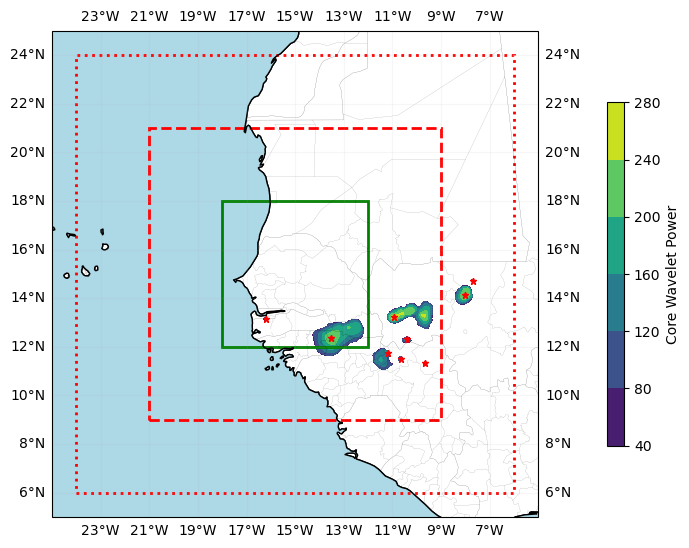

In [66]:
# Define extent
extent = (-25, -5, 5, 25)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional

gl = ax.gridlines(xlocs=np.arange(-23, -5, 2), 
                  ylocs=np.arange(6, 25, 2), 
                  draw_labels=True, 
                  crs=ccrs.PlateCarree(),
                  alpha=0.1
                )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)

ax.add_feature(admin_borders, edgecolor='black', linewidth=0.06)
#contour_presence = ax.contourf(lons, lats, binary_cores, levels = [0.5, 1] ,transform=ccrs.PlateCarree(), cmap="afmhot")
contour_core = ax.contourf(lons, lats, cores, levels=[40, 80, 120, 160, 200, 240, 280], transform=ccrs.PlateCarree(), cmap="viridis")
#plt.contour(lons, lats, cores, levels=[0], colors='red', transform=ccrs.PlateCarree())  

cbar_core = plt.colorbar(contour_core, fraction=0.03, pad=0.12)
cbar_core.set_label("Core Wavelet Power")

# Add the 6x6 square (green)
ax.add_patch(Rectangle((-18.0, 12.0), 6, 6, edgecolor='green', facecolor='none', linewidth=2))

# Add the 12x12 square (red)
ax.add_patch(Rectangle((-21.0, 9.0), 12, 12, edgecolor='red', facecolor='none', linewidth=2, linestyle="dashed"))

# Add the 18x18 square (red)
ax.add_patch(Rectangle((-24.0, 6.0), 18, 18, edgecolor='red', facecolor='none', linewidth=2, linestyle="dotted"))

for lt, ln in zip(lat, lon):    
  plt.plot(ln, lt, marker="*", color="red", markersize=5)

plt.tight_layout()
plt.show()


# Context Domain Coordinates for Senegal

In [78]:
# Domain of interest
Senegal_lon_min = -18.0
Senegal_lon_max = Senegal_lon_min + 6

Senegal_lat_min = 12.0
Senegal_lat_max = Senegal_lat_min + 6

# Context domain for shorter lead times
Senegal_context_short_lt_lon_min = -21.0
Senegal_context_short_lt_lon_max = Senegal_context_short_lt_lon_min + 12

Senegal_context_short_lt_lat_min = 9.0
Senegal_context_short_lt_lat_max = Senegal_context_short_lt_lat_min + 12

# Context domain for longer lead times
Senegal_context_long_lt_lon_min = -24.0
Senegal_context_long_lt_lon_max = Senegal_context_long_lt_lon_min + 18

Senegal_context_long_lt_lat_min = 6.0
Senegal_context_long_lt_lat_max = Senegal_context_long_lt_lat_min + 18

# Focus on Senegal

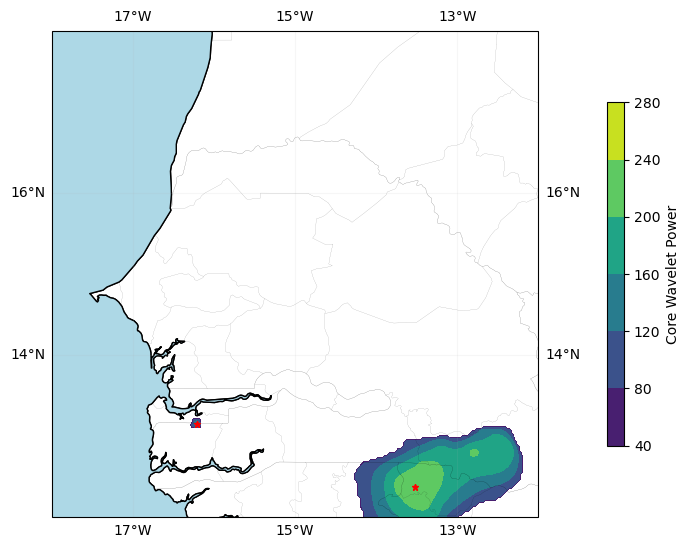

In [69]:
# Define extent
extent = (-18, -12, 12, 18)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional

gl = ax.gridlines(xlocs=np.arange(-23, -5, 2), 
                  ylocs=np.arange(6, 25, 2), 
                  draw_labels=True, 
                  crs=ccrs.PlateCarree(),
                  alpha=0.1
                )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)

ax.add_feature(admin_borders, edgecolor='black', linewidth=0.06)
#contour_presence = ax.contourf(lons, lats, binary_cores, levels = [0.5, 1] ,transform=ccrs.PlateCarree(), cmap="afmhot")
contour_core = ax.contourf(lons, lats, cores, levels=[40, 80, 120, 160, 200, 240, 280], transform=ccrs.PlateCarree(), cmap="viridis")
#plt.contour(lons, lats, cores, levels=[0], colors='red', transform=ccrs.PlateCarree())  

cbar_core = plt.colorbar(contour_core, fraction=0.03, pad=0.12)
cbar_core.set_label("Core Wavelet Power")

for lt, ln in zip(lat, lon):    
  plt.plot(ln, lt, marker="*", color="red", markersize=5)

plt.tight_layout()
plt.show()

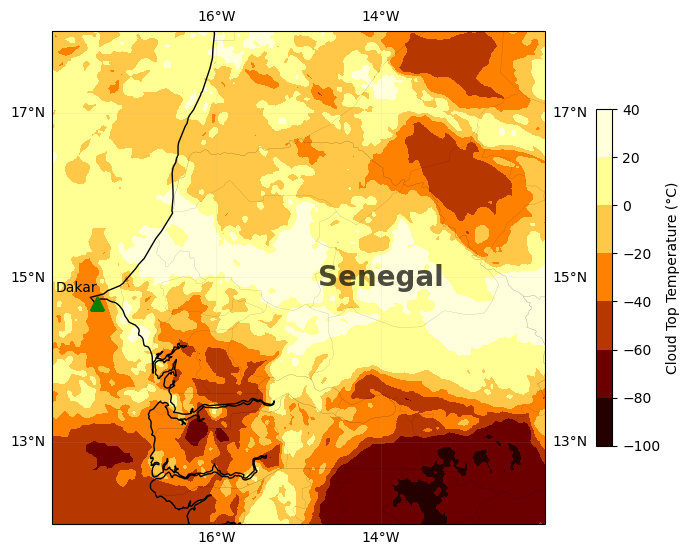

In [70]:
# Define extent
extent = (-18, -12, 12, 18)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Force background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Force LAND to be white
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Optional

gl = ax.gridlines(xlocs=np.array([-18, -16, -14, -12]), 
                  ylocs=np.array([11, 13, 15, 17]), 
                  draw_labels=True, 
                  crs=ccrs.PlateCarree(),
                  alpha=0.1
                )

# Add administrative borders
admin_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none'
)

ax.add_feature(admin_borders, edgecolor='black', linewidth=0.06)
contour_temperature = ax.contourf(lons, lats, temp,transform=ccrs.PlateCarree(), cmap="afmhot")
cbar_temperature = plt.colorbar(contour_temperature, fraction=0.03, pad=0.09)
cbar_temperature.set_label("Cloud Top Temperature (°C)")

#plt.contour(lons, lats, cores, levels=[0], colors='cyan', transform=ccrs.PlateCarree())  

# for lt, ln in zip(lat, lon):    
#   plt.plot(ln, lt, marker="*", color="red", markersize=5)


ax.text(-14, 15, "Senegal", fontsize=20, fontweight="bold", color="black",
        transform=ccrs.PlateCarree(), ha="center", va="center", alpha=0.7)

# Plot a marker at Dakar's location
Dakar_lon, Dakar_lat = -17.45, 14.69
plt.plot(Dakar_lon, Dakar_lat, marker="^", color="green", markersize=10)
plt.text(Dakar_lon, Dakar_lat+0.1, "Dakar", ha="right", va="bottom")
plt.tight_layout()
plt.show()
